In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [8]:
#load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))
print(num_labels)


10


In [9]:
print(y_train)
#print(x_train)

[5 0 4 ... 5 6 8]


In [10]:
#convert to one-hot vector
y_train = to_categorical(y_train)
print(y_train)
y_test = to_categorical(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
#resize and normalizei
image_size = x_train.shape[1]
print(x_train.shape)
x_train = np.reshape(x_train, [-1, image_size, image_size])
print(x_train.shape)

x_test = np.reshape(x_test, [-1, image_size, image_size])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

(60000, 28, 28)
(60000, 28, 28)


In [0]:
#network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


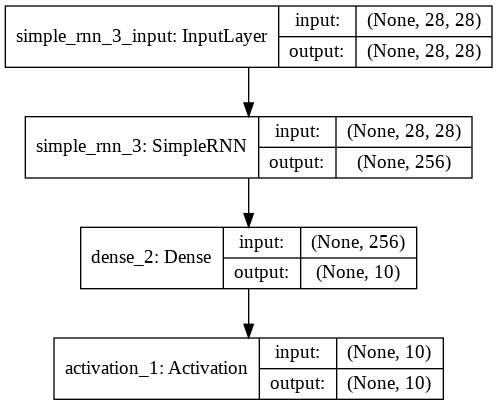

In [15]:
#model is RNN with 256 units (output) , input is 28-dim vector 28 timestep
model = Sequential()
model.add(SimpleRNN(units=units, dropout=dropout, input_shape = input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, show_shapes=True)


In [19]:
%%time
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
acc

Epoch 1/20
60000/60000 [==============================] - 31s 520us/step - loss: 0.2855 - acc: 0.9164
Epoch 2/20
60000/60000 [==============================] - 31s 509us/step - loss: 0.2388 - acc: 0.9282
Epoch 3/20
60000/60000 [==============================] - 31s 513us/step - loss: 0.2082 - acc: 0.9374
Epoch 4/20
60000/60000 [==============================] - 31s 512us/step - loss: 0.1884 - acc: 0.9435
Epoch 5/20
60000/60000 [==============================] - 31s 509us/step - loss: 0.1728 - acc: 0.9482
Epoch 6/20
60000/60000 [==============================] - 31s 514us/step - loss: 0.1544 - acc: 0.9538
Epoch 7/20
60000/60000 [==============================] - 31s 510us/step - loss: 0.1461 - acc: 0.9565
Epoch 8/20
60000/60000 [==============================] - 30s 507us/step - loss: 0.1371 - acc: 0.9597
Epoch 9/20
60000/60000 [==============================] - 30s 507us/step - loss: 0.1304 - acc: 0.9613
Epoch 10/20
60000/60000 [==============================] - 30s 505us/step - loss: 

In [20]:
acc

0.9769